In [61]:
import requests
import pandas as pd

# OpenSky API Endpoint
URL = "https://opensky-network.org/api/states/all"

# Fetch real-time flight data
response = requests.get(URL)
data = response.json()

# Extract relevant columns
columns = ["icao24", "callsign", "origin_country", "time_position", "longitude", "latitude", "velocity", "altitude", "on_ground"]
flights = []

# Parse response data
for flight in data["states"]:
    flights.append([
        flight[0], flight[1], flight[2], flight[3], flight[5], flight[6], flight[9], flight[7], flight[8]
    ])

# Convert to DataFrame
df_flights = pd.DataFrame(flights, columns=columns)

# Display sample data
print(df_flights.head())

   icao24  callsign origin_country  time_position  longitude  latitude  \
0  4b1816  SWR357K     Switzerland   1.741552e+09     4.6341   48.3068   
1  ac96b4  N910AJ    United States   1.741552e+09   -81.8466   26.6959   
2  4b1818  SWR736      Switzerland   1.741552e+09     5.9211   49.5739   
3  a2e5f5  N286TG    United States   1.741552e+09   -89.3753   40.5618   
4  a46e70  LXJ385    United States   1.741552e+09   -82.1264   31.3184   

   velocity  altitude  on_ground  
0    217.34  10668.00      False  
1    139.10   4312.92      False  
2    225.72  11590.02      False  
3     45.51    883.92      False  
4    157.70   9753.60      False  


In [8]:
pip install requests pandas sqlalchemy psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install sqlalchemy psycopg2 python-dotenv

In [23]:
pip install python-dotenv

In [63]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Read database credentials
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Convert port to integer (default to 5432 if missing)
DB_PORT = int(DB_PORT) if DB_PORT else 5432

# Create database URL
DB_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Test connection
try:
    engine = create_engine(DB_URL)
    with engine.connect() as conn:
        print("✅ Connected to PostgreSQL successfully (using .env)!")
except Exception as e:
    print("❌ Connection failed:", e)

✅ Connected to PostgreSQL successfully (using .env)!


In [65]:
import requests
import pandas as pd

# OpenSky API Endpoint
URL = "https://opensky-network.org/api/states/all"

# Fetch real-time flight data
response = requests.get(URL)
data = response.json()

# Extract relevant columns
columns = ["icao24", "callsign", "origin_country", "time_position", "longitude", "latitude", "velocity", "altitude", "on_ground"]
flights = []

# Parse response data
for flight in data["states"]:
    flights.append([
        flight[0], flight[1], flight[2], flight[3], flight[5], flight[6], flight[9], flight[7], flight[8]
    ])

# Convert to DataFrame
df_flights = pd.DataFrame(flights, columns=columns)

# Display sample data
print(df_flights.head())

   icao24  callsign origin_country  time_position  longitude  latitude  \
0  4b1816  SWR357K     Switzerland   1.741552e+09     4.6486   48.3036   
1  ac96b4  N910AJ    United States   1.741552e+09   -81.8466   26.6959   
2  4b1818  SWR736      Switzerland   1.741552e+09     5.9127   49.5821   
3  a2e5f5  N286TG    United States   1.741552e+09   -89.3762   40.5708   
4  a46e70  LXJ385    United States   1.741552e+09   -82.1280   31.3109   

   velocity  altitude  on_ground  
0    217.34  10668.00      False  
1    139.10   4312.92      False  
2    225.29  11590.02      False  
3     49.56    899.16      False  
4    157.60   9753.60      False  


In [53]:
from sqlalchemy import create_engine

# Store data in PostgreSQL
try:
    df_flights.to_sql("flights", engine, if_exists="replace", index=False)
    print("✅ Real-time flight data stored successfully!")
except Exception as e:
    print("❌ Data insertion failed:", e)

✅ Real-time flight data stored successfully!


In [55]:
import pandas as pd

# Read data from PostgreSQL
try:
    df_from_db = pd.read_sql("SELECT * FROM flights", engine)
    print("✅ Retrieved data from PostgreSQL!")
    display(df_from_db.head())  # Show sample data
except Exception as e:
    print("❌ Failed to retrieve data:", e)

✅ Retrieved data from PostgreSQL!


,icao24,callsign,origin_country,time_position,longitude,latitude,velocity,altitude,on_ground
0,4b1816,SWR357K,Switzerland,1.741551e+09,2.5915,48.7985,218.62,10683.24,False
1,ac96b4,N910AJ,United States,1.741551e+09,-81.6045,25.8564,150.38,5486.40,False
2,4b1818,SWR736,Switzerland,1.741551e+09,7.1723,48.2820,225.89,10081.26,False
3,a2e5f5,N286TG,United States,1.741551e+09,-89.3423,40.2318,45.62,899.16,False
4,a46e70,LXJ385,United States,1.741551e+09,-81.8851,32.3852,168.69,9753.60,False


In [57]:
df_from_db["origin_country"].value_counts().head(10)

origin_country
United States     6635
Canada             352
United Kingdom     342
Ireland            276
Turkey             198
Germany            156
Spain              151
Australia          146
France             143
Malta              130
Name: count, dtype: int64

In [67]:
df_from_db["delayed"] = (df_from_db["velocity"] < 150) & (df_from_db["altitude"] > 10000)
df_delayed = df_from_db[df_from_db["delayed"]]

print(f"🛑 {len(df_delayed)} flights are potentially delayed.")
display(df_delayed)

🛑 48 flights are potentially delayed.


,icao24,callsign,origin_country,time_position,longitude,latitude,velocity,altitude,on_ground,delayed
9,a3feeb,N357BD,United States,1.741551e+09,-104.8350,39.5690,42.51,16093.44,False,True
567,471f78,WZZ533J,Hungary,1.741551e+09,19.1622,54.7164,4.12,10988.04,False,True
668,a41fbc,N365JW,United States,1.741551e+09,-90.8338,29.9016,100.57,10972.80,False,True
1017,a30869,N295DS,United States,1.741551e+09,-84.1912,39.0061,121.93,11582.40,False,True
1134,a82075,N6223J,United States,1.741551e+09,-120.7135,37.4999,37.91,12915.90,False,True
1408,73805c,ELY845,Israel,1.741551e+09,35.9993,31.7170,0.00,11582.40,False,True
1472,151dd5,AFL1450,Russian Federation,1.741551e+09,48.5231,55.9549,40.25,10668.00,False,True
1663,a005fa,N100PA,United States,1.741551e+09,-84.1568,38.5935,124.28,12192.00,False,True
1696,151f0e,UTA571,Russian Federation,1.741550e+09,49.0436,55.9729,34.84,11277.60,False,True
1803,aa18b2,N75LH,United States,1.741551e+09,-86.5366,34.0934,143.20,12992.10,False,True


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Read database credentials
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Create database connection string
DB_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(DB_URL)

# Load Data from PostgreSQL into a DataFrame
df = pd.read_sql("SELECT * FROM flights WHERE latitude IS NOT NULL AND longitude IS NOT NULL", engine)

# Convert flight_time column to datetime format
df["flight_time"] = pd.to_datetime(df["flight_time"])


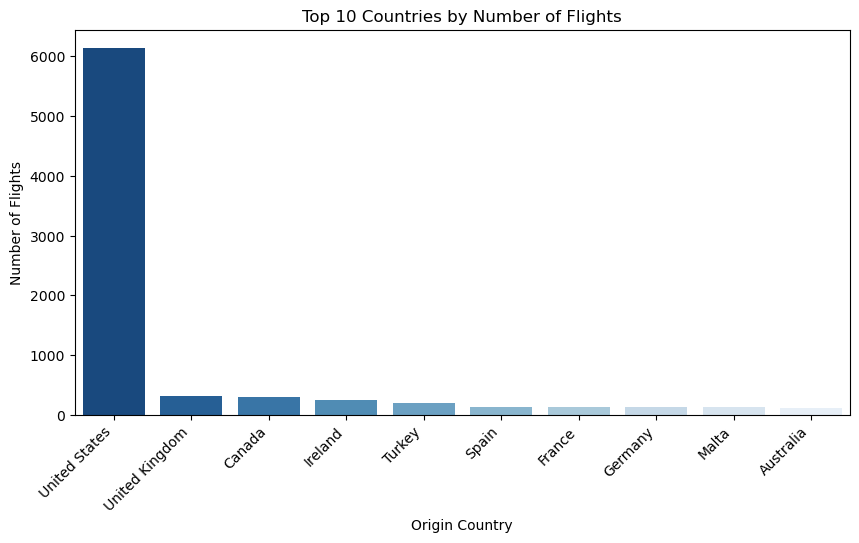

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Bar Chart for Top 10 Countries by Number of Flights
plt.figure(figsize=(10, 5))
top_countries = df["origin_country"].value_counts().head(10).reset_index()
top_countries.columns = ["origin_country", "count"]  # Rename columns for clarity

sns.barplot(x="origin_country", y="count", data=top_countries, hue="origin_country", palette="Blues_r", legend=False)

plt.xlabel("Origin Country")
plt.ylabel("Number of Flights")
plt.title("Top 10 Countries by Number of Flights")

# Rotate country names for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

✅ Total Number of Flights: 9636


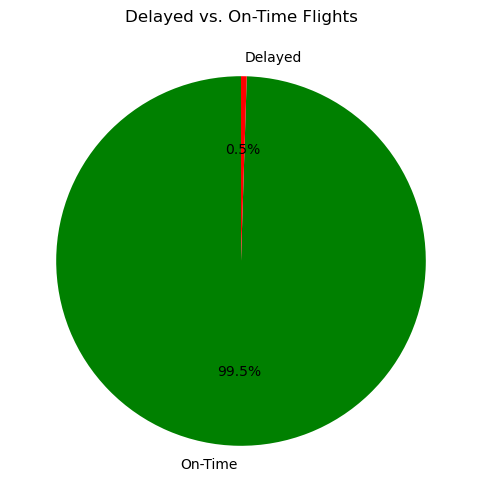

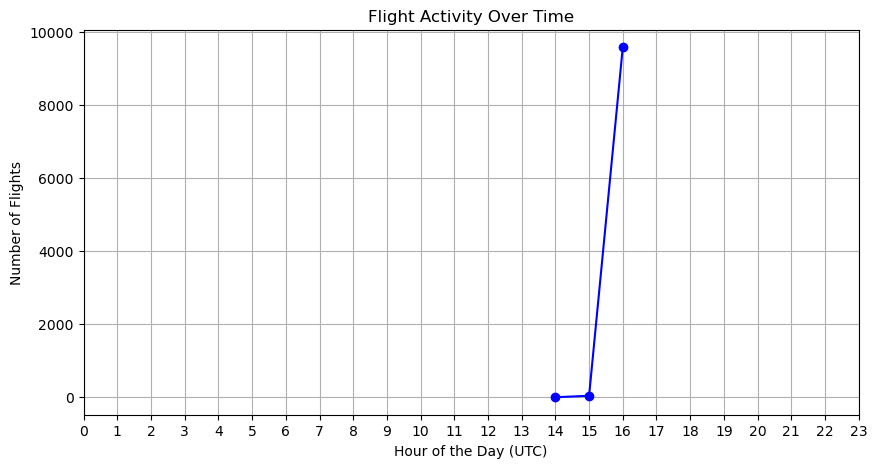

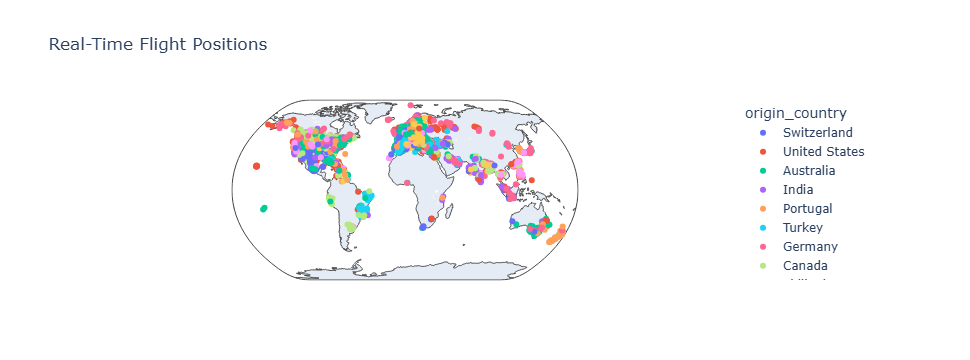

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Read database credentials
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Create database connection string
DB_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(DB_URL)

# Load Data from PostgreSQL into a DataFrame
df = pd.read_sql("SELECT * FROM flights WHERE latitude IS NOT NULL AND longitude IS NOT NULL", engine)

# Convert flight_time column to datetime format
df["flight_time"] = pd.to_datetime(df["flight_time"])

# --------- 1 Total Flights Count (Card) ---------
total_flights = df["icao24"].nunique()
print(f"✅ Total Number of Flights: {total_flights}")



# --------- 2 Pie Chart: Delayed vs. On-Time Flights ---------
df["delayed"] = (df["velocity"] < 150) & (df["altitude"] > 10000)
delayed_counts = df["delayed"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(delayed_counts, labels=["On-Time", "Delayed"], autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Delayed vs. On-Time Flights")
plt.show()

# --------- 3 Line Chart: Flight Activity Over Time ---------
df_grouped = df.groupby(df["flight_time"].dt.hour)["icao24"].count()

plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Hour of the Day (UTC)")
plt.ylabel("Number of Flights")
plt.title("Flight Activity Over Time")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# --------- 4 Interactive Map: Real-Time Flight Positions ---------
fig = px.scatter_geo(df, lat="latitude", lon="longitude", color="origin_country", 
                     hover_name="callsign", title="Real-Time Flight Positions",
                     projection="natural earth")

fig.show()

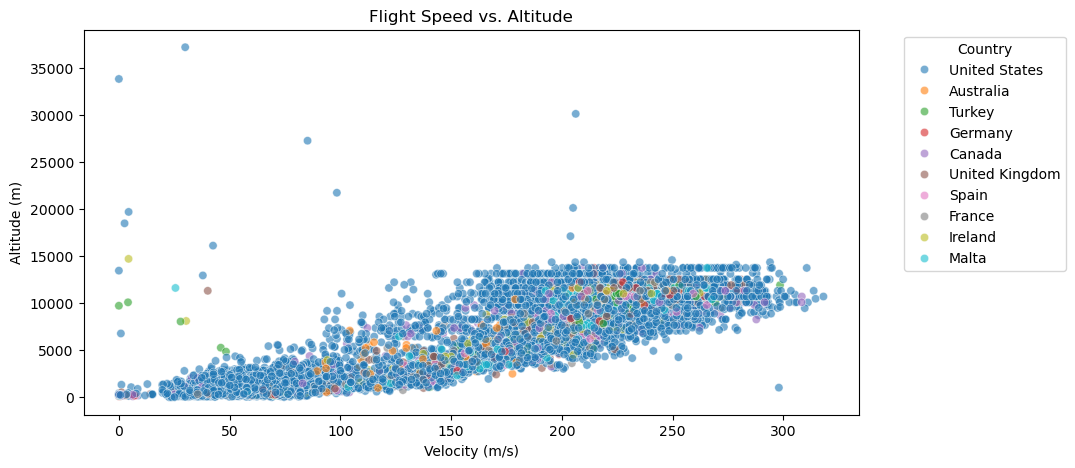

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit the number of unique countries in the legend (Top 10 Most Frequent)
top_countries = df["origin_country"].value_counts().head(10).index
df_filtered = df[df["origin_country"].isin(top_countries)]

# Create Scatter Plot (Filtered)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["velocity"], y=df_filtered["altitude"], hue=df_filtered["origin_country"], alpha=0.6)

plt.xlabel("Velocity (m/s)")
plt.ylabel("Altitude (m)")
plt.title("Flight Speed vs. Altitude")

# Move legend outside for better visibility
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Ensure the visuals directory exists
os.makedirs("visuals", exist_ok=True)

# ✅ 1️⃣ Fixed: Bar Chart (Top 10 Countries by Flights)
plt.figure(figsize=(12, 6))
top_countries = df["origin_country"].value_counts().head(10).reset_index()
top_countries.columns = ["origin_country", "count"]
sns.barplot(x="count", y="origin_country", data=top_countries, hue="origin_country", palette="Blues_r", legend=False)
plt.xlabel("Number of Flights")
plt.ylabel("Origin Country")
plt.title("Top 10 Countries by Number of Flights")
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/bar_chart.png", bbox_inches="tight", dpi=300)
plt.close()

# ✅ 2️⃣ Fixed: Interactive Scatter Plot with Dropdown (Flight Speed vs Altitude)
top_countries = df["origin_country"].value_counts().head(10).index
df_filtered = df[df["origin_country"].isin(top_countries)]

fig = px.scatter(
    df_filtered, x="velocity", y="altitude", color="origin_country",
    title="Flight Speed vs. Altitude",
    hover_data=["callsign"],
)

fig.update_layout(
    updatemenus=[{
        "buttons": [
            {"label": "All Countries", "method": "update", "args": [{"visible": True}]}
        ] + [
            {"label": country, "method": "update",
             "args": [{"visible": df_filtered["origin_country"] == country}]} 
            for country in top_countries
        ],
        "direction": "down",
        "showactive": True,
    }]
)

fig.write_html("visuals/scatter_plot.html", auto_open=False)

# ✅ 3️⃣ Fixed: Pie Chart (Delayed vs On-Time Flights)
plt.figure(figsize=(6, 6))
df["delayed"] = (df["velocity"] < 150) & (df["altitude"] > 10000)
delayed_counts = df["delayed"].value_counts()
plt.pie(delayed_counts, labels=["On-Time", "Delayed"], autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Delayed vs. On-Time Flights")
plt.savefig("visuals/pie_chart.png", bbox_inches="tight", dpi=300)
plt.close()

# ✅ 4️⃣ Fixed: Line Chart (Flight Activity Over Time)
plt.figure(figsize=(10, 5))
df_grouped = df.groupby(df["flight_time"].dt.hour)["icao24"].count()
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Hour of the Day (UTC)")
plt.ylabel("Number of Flights")
plt.title("Flight Activity Over Time")
plt.xticks(range(0, 24))
plt.grid()
plt.savefig("visuals/line_chart.png", bbox_inches="tight", dpi=300)
plt.close()

# ✅ 5️⃣ Save Interactive Map
html_map = "visuals/flight_map.html"
pio.write_html(fig, file=html_map, auto_open=False)

# ✅ 6️⃣ Generate HTML Report with Interactive Scatter Plot
html_report = "flight_analysis_report.html"

html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Flight Data Analysis Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; text-align: center; margin: 20px; }}
        img {{ width: 80%; max-width: 800px; margin-bottom: 20px; }}
        iframe {{ width: 100%; height: 600px; border: none; }}
    </style>
</head>
<body>
    <h1>Flight Data Analysis Report</h1>
    
    <h2>1️⃣ Top 10 Countries by Number of Flights</h2>
    <img src="visuals/bar_chart.png" alt="Bar Chart">

    <h2>2️⃣ Flight Speed vs. Altitude (With Dropdown Filter)</h2>
    <iframe src="visuals/scatter_plot.html"></iframe>

    <h2>3️⃣ Delayed vs. On-Time Flights</h2>
    <img src="visuals/pie_chart.png" alt="Pie Chart">

    <h2>4️⃣ Flight Activity Over Time</h2>
    <img src="visuals/line_chart.png" alt="Line Chart">

    <h2>5️⃣ Interactive Flight Map</h2>
    <iframe src="visuals/flight_map.html"></iframe>
</body>
</html>
"""

# Save the HTML file
with open(html_report, "w", encoding="utf-8") as file:
    file.write(html_content)

print(f"✅ Interactive report saved as {html_report}")


✅ Interactive report saved as flight_analysis_report.html
